In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
import pandas as pd

In [10]:
s_true = pd.read_csv('./P4_trajectory.txt', header=None)

Am I supposed to plot 3d here? Or just x, y, and z separately?

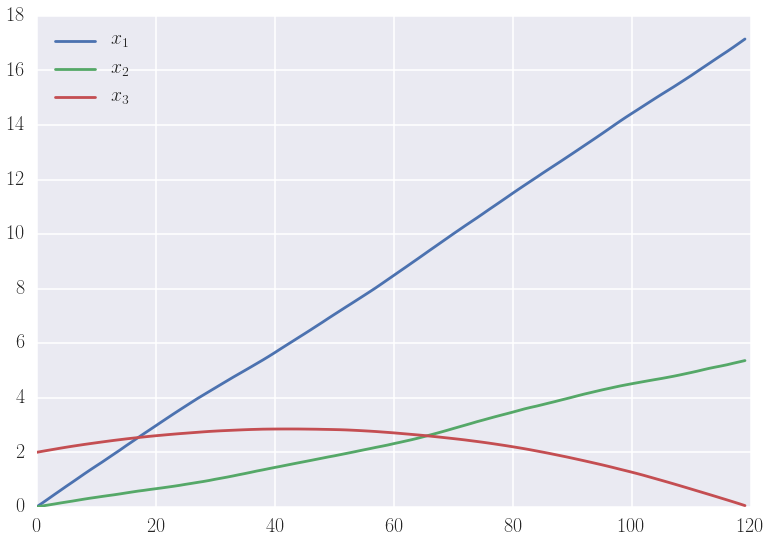

In [22]:
plt.plot(s_true.loc[:, 0:2])
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], loc='best')

In [25]:
measurements = pd.read_csv('./P4_measurements.txt', header=None)

In [27]:
rx = 0.5
ry = 0.5
rz = 0.5

In [28]:
rescale_matrix = np.array([[1/rx, 0, 0],
                           [0, 1/ry, 0],
                           [0, 0, 1/rz]
                           ])

Luckily we can decompose this. But, we can try to be slightly more clever, in case the matrix elements become correlated...

In [32]:
np.apply_along_axis(lambda x: rescale_matrix * x, 1, measurements)

ValueError: could not broadcast input array from shape (3,3) into shape (3)

In [37]:
measurements.loc[0, :]

0    -0.28359
1     0.51762
2    13.77800
Name: 0, dtype: float64

In [38]:
rescale_matrix*measurements.loc[0, :].values

array([[ -0.56718,   0.     ,   0.     ],
       [ -0.     ,   1.03524,   0.     ],
       [ -0.     ,   0.     ,  27.556  ]])

Let's just decouple these.